# Problem Statement

4.	In the recruitment domain, HR faces the challenge of predicting if the candidate is faking their salary or not. For example, a candidate claims to have 5 years of experience and earns 70,000 per month working as a regional manager. The candidate expects more money than his previous CTC. We need a way to verify their claims (is 70,000 a month working as a regional manager with an experience of 5 years a genuine claim or does he/she make less than that?) Build a Decision Tree and Random Forest model with monthly income as the target variable. 

-------------------- ##### -----------------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
plt.rcParams['figure.figsize'] = (10,15)

In [40]:
data = pd.read_csv('HR_DT.csv')
data.shape

(196, 3)

We have 196 rows and 3 columns in our dataset

Lets explore our dataset

In [3]:
data.columns

Index(['Position', 'Experience', 'Montly_Income'], dtype='object')

In [4]:
data.dtypes

Position          object
Experience       float64
Montly_Income      int64
dtype: object

Lets check for any missing value in our dataset

<AxesSubplot:>

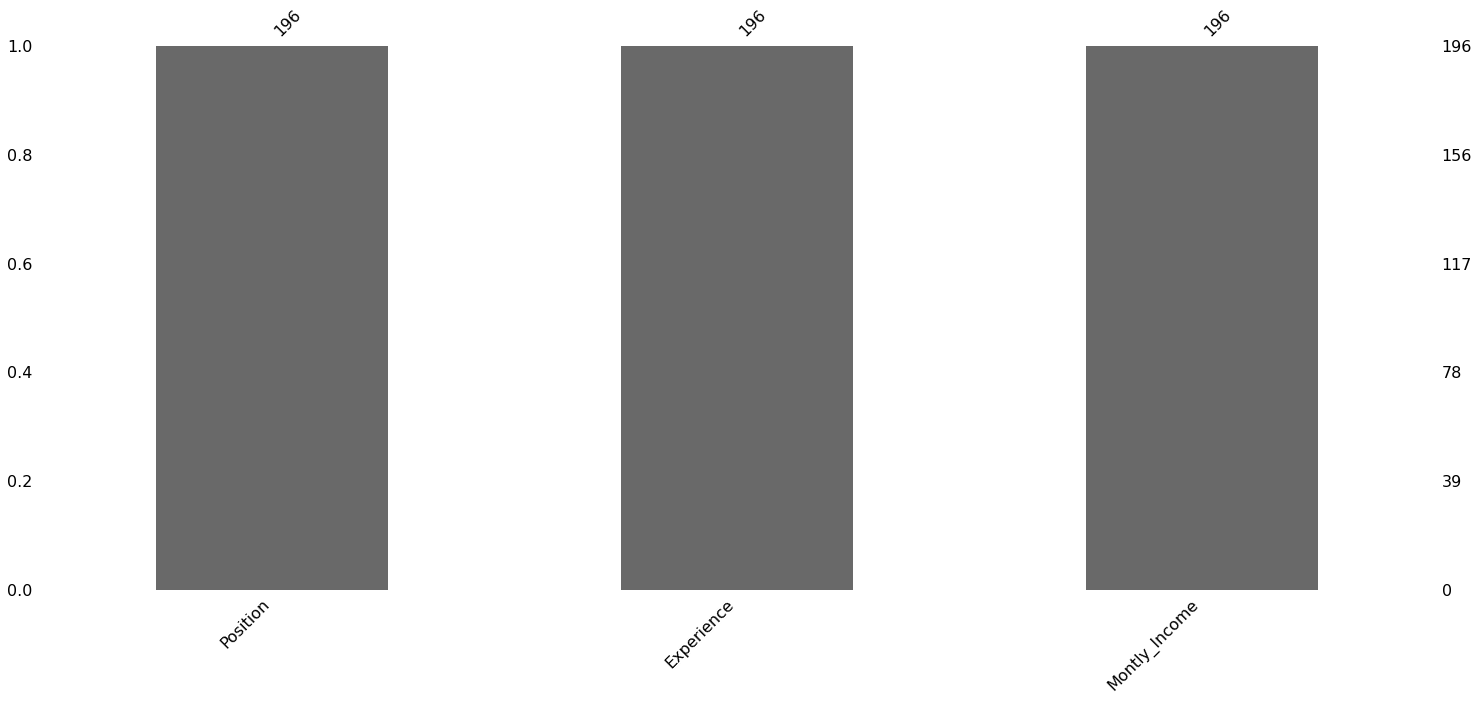

In [5]:
msno.bar(data)

There are no missing values in our dataset

In [6]:
data.describe(include='all')

,Position,Experience,Montly_Income
count,196,196.000000,196.000000
unique,10,NaN,NaN
top,Partner,NaN,NaN
freq,28,NaN,NaN
mean,NaN,5.112245,74194.923469
std,NaN,2.783993,26731.578387
min,NaN,1.000000,37731.000000
25%,NaN,3.000000,56430.000000
50%,NaN,4.100000,63831.500000
75%,NaN,7.100000,98273.000000


In [7]:
data['Position'].value_counts()

Partner              28
Senior Partner       25
C-level              24
Region Manager       23
CEO                  23
Country Manager      18
Manager              17
Senior Consultant    16
Junior Consultant    14
Business Analyst      8
Name: Position, dtype: int64

In [8]:
data['Experience'].value_counts()

4.0     14
3.2     14
1.3      7
4.5      7
4.1      7
3.9      7
3.7      7
1.1      7
3.0      7
2.9      7
2.2      7
2.0      7
1.5      7
8.2      6
10.5     6
10.3     6
9.6      6
9.5      6
9.0      6
8.7      6
5.1      6
7.9      6
7.1      6
6.8      6
6.0      6
5.9      6
5.3      6
4.9      6
1.0      1
Name: Experience, dtype: int64

array([[<AxesSubplot:title={'center':'Experience'}>,
        <AxesSubplot:title={'center':'Montly_Income'}>]], dtype=object)

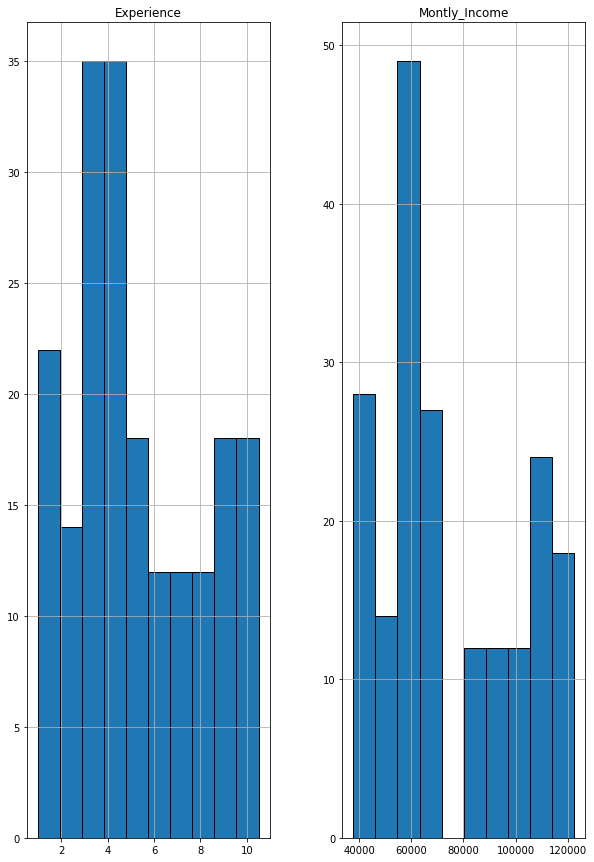

In [9]:
data.hist(edgecolor='black')

C:\Users\jaich\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Experience', ylabel='Montly_Income'>

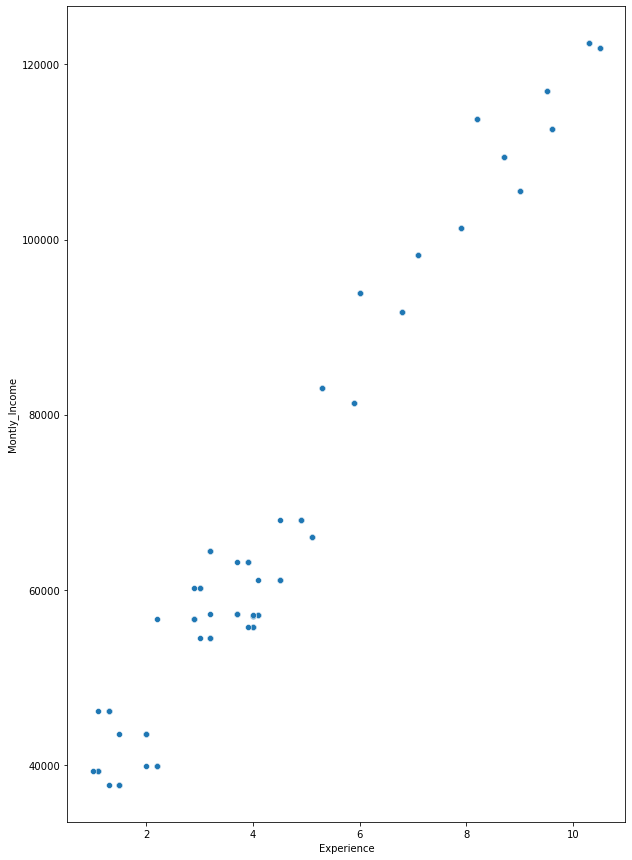

In [41]:
sns.scatterplot('Experience','Montly_Income', data=data)

<AxesSubplot:>

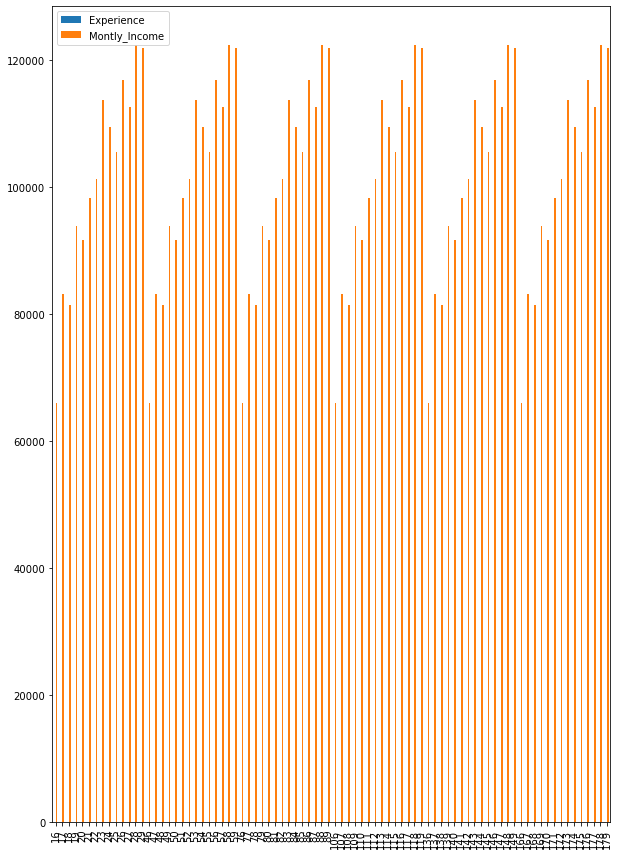

In [44]:
data[data['Experience']>5.0].plot(kind='bar')

It does looks like if experience is more then 5 years then salary is close to 70K 

As per the requirement, we need to Transform our Monthly Income values to as follows:

- <= 70000 then Bluffy
- > 70000 then Truth

Lets transform the column and build DT model

In [46]:
data['Category'] = np.where(data['Montly_Income'] <70000,"Bluffy","Truth")
data.head()

,Position,Experience,Montly_Income,Category
0,Business Analyst,1.1,39343,Bluffy
1,Junior Consultant,1.3,46205,Bluffy
2,Senior Consultant,1.5,37731,Bluffy
3,Manager,2.0,43525,Bluffy
4,Country Manager,2.2,39891,Bluffy


In [47]:
data['Category'].value_counts()

Bluffy    118
Truth      78
Name: Category, dtype: int64

Now we have categorised our Montly Income column, we can drop this column from our dataset

In [48]:
data = data.drop('Montly_Income', axis=1)

In [49]:
data.head()

,Position,Experience,Category
0,Business Analyst,1.1,Bluffy
1,Junior Consultant,1.3,Bluffy
2,Senior Consultant,1.5,Bluffy
3,Manager,2.0,Bluffy
4,Country Manager,2.2,Bluffy


In [50]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [51]:
data['Position'] = lb.fit_transform(data['Position'])
data['Category'] = lb.fit_transform(data['Category'])


In [52]:
data.head()

,Position,Experience,Category
0,0,1.1,0
1,4,1.3,0
2,8,1.5,0
3,5,2.0,0
4,3,2.2,0


Lets build DT Models

In [53]:
colnames = list(data.columns)

In [54]:
predictors = colnames[:2]
target = colnames[-1]

In [55]:
predictors

['Position', 'Experience']

In [56]:
target

'Category'

In [57]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.3)

In [58]:
from sklearn.tree import DecisionTreeClassifier as DT

In [59]:
model = DT(criterion = 'entropy')
model.fit(train[predictors], train[target])

DecisionTreeClassifier(criterion='entropy')

In [60]:
# Prediction on Train Data
preds = model.predict(train[predictors])
pd.crosstab(train[target], preds, rownames = ['Actual'], colnames = ['Predictions'])

Predictions,0,1
Actual,,
0,85,0
1,0,52


In [61]:
# prediction on Test data
preds = model.predict(test[predictors])
pd.crosstab(test[target], preds, rownames=['Actual'], colnames=['Predictions'])

Predictions,0,1
Actual,,
0,33,0
1,0,26


In [62]:
np.mean(preds==test[target]) # Test Data Accuracy

1.0

Lets Prune model

In [63]:
predictors = data.loc[:,data.columns!='Category']
target = data['Category']

In [64]:
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.3, random_state=5)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(137, 2) (59, 2) (137,) (59,)


In [65]:
from sklearn import tree
regtree = tree.DecisionTreeRegressor(max_depth=3)
regtree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [66]:
# Prediction
test_pred = regtree.predict(x_test)
train_pred = regtree.predict(x_train)

In [67]:
# Measuring accuracy
from sklearn.metrics import mean_squared_error, r2_score

In [68]:
# Error on train dataset
mean_squared_error(y_train, train_pred)
r2_score(y_train, train_pred)

1.0

In [69]:
# Error on test dataset
mean_squared_error(y_test, test_pred)
r2_score(y_test, test_pred)

1.0

In [70]:
regtree = tree.DecisionTreeRegressor(max_depth=4)
regtree.fit(x_train,y_train)

# Prediction
test_pred = regtree.predict(x_test)
train_pred = regtree.predict(x_train)

# Error on train dataset
print("Train Error",mean_squared_error(y_train, train_pred))
print("Train Error",r2_score(y_train, train_pred))

# Error on test dataset
print("Test Error",mean_squared_error(y_test, test_pred))
print("Test Error",r2_score(y_test, test_pred))

Train Error 0.0
Train Error 1.0
Test Error 0.0
Test Error 1.0


In [71]:
regtree = tree.DecisionTreeRegressor(max_depth=5)
regtree.fit(x_train,y_train)

# Prediction
test_pred = regtree.predict(x_test)
train_pred = regtree.predict(x_train)

# Error on train dataset
print("Train Error",mean_squared_error(y_train, train_pred))
print("Train Error",r2_score(y_train, train_pred))

# Error on test dataset
print("Test Error",mean_squared_error(y_test, test_pred))
print("Test Error",r2_score(y_test, test_pred))

Train Error 0.0
Train Error 1.0
Test Error 0.0
Test Error 1.0


In [72]:
regtree = tree.DecisionTreeRegressor(max_depth=6)
regtree.fit(x_train,y_train)

# Prediction
test_pred = regtree.predict(x_test)
train_pred = regtree.predict(x_train)

# Error on train dataset
print("Train Error",mean_squared_error(y_train, train_pred))
print("Train Error",r2_score(y_train, train_pred))

# Error on test dataset
print("Test Error",mean_squared_error(y_test, test_pred))
print("Test Error",r2_score(y_test, test_pred))

Train Error 0.0
Train Error 1.0
Test Error 0.0
Test Error 1.0


Min Sample Split

In [73]:
regtree2 = tree.DecisionTreeRegressor(min_samples_split = 3)
regtree2.fit(x_train, y_train)

# Prediction
test_pred2 = regtree2.predict(x_test)
train_pred2 = regtree2.predict(x_train)

# Error on train dataset
print("Train Error with Mean Square",mean_squared_error(y_train, train_pred2))
print("Train Error with R2",r2_score(y_train, train_pred2))

# Error on test dataset
print("Test Error with Mean Square",mean_squared_error(y_test, test_pred2))
print("Test Error with R2",r2_score(y_test, test_pred2))

Train Error with Mean Square 0.0
Train Error with R2 1.0
Test Error with Mean Square 0.0
Test Error with R2 1.0


In [74]:
regtree2 = tree.DecisionTreeRegressor(min_samples_split = 4)
regtree2.fit(x_train, y_train)

# Prediction
test_pred2 = regtree2.predict(x_test)
train_pred2 = regtree2.predict(x_train)

# Error on train dataset
print("Train Error with Mean Square",mean_squared_error(y_train, train_pred2))
print("Train Error with R2",r2_score(y_train, train_pred2))

# Error on test dataset
print("Test Error with Mean Square",mean_squared_error(y_test, test_pred2))
print("Test Error with R2",r2_score(y_test, test_pred2))

Train Error with Mean Square 0.0
Train Error with R2 1.0
Test Error with Mean Square 0.0
Test Error with R2 1.0


In [75]:
regtree2 = tree.DecisionTreeRegressor(min_samples_split = 5)
regtree2.fit(x_train, y_train)

# Prediction
test_pred2 = regtree2.predict(x_test)
train_pred2 = regtree2.predict(x_train)

# Error on train dataset
print("Train Error with Mean Square",mean_squared_error(y_train, train_pred2))
print("Train Error with R2",r2_score(y_train, train_pred2))

# Error on test dataset
print("Test Error with Mean Square",mean_squared_error(y_test, test_pred2))
print("Test Error with R2",r2_score(y_test, test_pred2))

Train Error with Mean Square 0.0
Train Error with R2 1.0
Test Error with Mean Square 0.0
Test Error with R2 1.0


Min Sample Leaf Method

In [76]:
## Minimum observations at the leaf node approach
regtree3 = tree.DecisionTreeRegressor(min_samples_leaf = 3)
regtree3.fit(x_train, y_train)

# Prediction
test_pred3 = regtree3.predict(x_test)
train_pred3 = regtree3.predict(x_train)

# measure of error on train dataset
print("Train Error with Mean Squared",mean_squared_error(y_train, train_pred3))
print("Train Error with R2",r2_score(y_train, train_pred3))

# measure of error on test dataset
print("Test Error with Mean Squared",mean_squared_error(y_test, test_pred3))
print("Test Error with R2",r2_score(y_test, test_pred3))

Train Error with Mean Squared 0.0
Train Error with R2 1.0
Test Error with Mean Squared 0.0
Test Error with R2 1.0


In [77]:
## Minimum observations at the leaf node approach
regtree3 = tree.DecisionTreeRegressor(min_samples_leaf = 4)
regtree3.fit(x_train, y_train)

# Prediction
test_pred3 = regtree3.predict(x_test)
train_pred3 = regtree3.predict(x_train)

# measure of error on train dataset
print("Train Error with Mean Squared",mean_squared_error(y_train, train_pred3))
print("Train Error with R2",r2_score(y_train, train_pred3))

# measure of error on test dataset
print("Test Error with Mean Squared",mean_squared_error(y_test, test_pred3))
print("Test Error with R2",r2_score(y_test, test_pred3))

Train Error with Mean Squared 0.0
Train Error with R2 1.0
Test Error with Mean Squared 0.0
Test Error with R2 1.0


In [78]:
## Minimum observations at the leaf node approach
regtree3 = tree.DecisionTreeRegressor(min_samples_leaf = 5)
regtree3.fit(x_train, y_train)

# Prediction
test_pred3 = regtree3.predict(x_test)
train_pred3 = regtree3.predict(x_train)

# measure of error on train dataset
print("Train Error with Mean Squared",mean_squared_error(y_train, train_pred3))
print("Train Error with R2",r2_score(y_train, train_pred3))

# measure of error on test dataset
print("Test Error with Mean Squared",mean_squared_error(y_test, test_pred3))
print("Test Error with R2",r2_score(y_test, test_pred3))

Train Error with Mean Squared 0.0
Train Error with R2 1.0
Test Error with Mean Squared 0.0
Test Error with R2 1.0


Random Forest Classifier

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
rf_clf = RandomForestClassifier(n_estimators=600, n_jobs=1, random_state=42)

In [81]:
rf_clf.fit(x_train, y_train)


RandomForestClassifier(n_estimators=600, n_jobs=1, random_state=42)

In [82]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [83]:
print(confusion_matrix(y_test, rf_clf.predict(x_test)))
print(accuracy_score(y_test, rf_clf.predict(x_test)))

[[31  0]
 [ 0 28]]
1.0


Grid Search

In [85]:
# Grid Search
from sklearn.model_selection import GridSearchCV

rf_clf_grid = RandomForestClassifier(n_estimators=600, n_jobs=1, random_state=42)

param_grid = {"max_features": [2,3], "min_samples_split": [2, 3, 10]}

grid_search = GridSearchCV(rf_clf_grid, param_grid, n_jobs = -1, cv = 5, scoring = 'accuracy')

grid_search.fit(x_train, y_train)

grid_search.best_params_

cv_rf_clf_grid = grid_search.best_estimator_

from sklearn.metrics import accuracy_score, confusion_matrix

confusion_matrix(y_test, cv_rf_clf_grid.predict(x_test))
accuracy_score(y_test, cv_rf_clf_grid.predict(x_test))

C:\Users\jaich\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [ 1.  1.  1. nan nan nan]
  warnings.warn(


1.0

Based on the data, the claim seems to be true that if experience is > 5 yrs then it is 70k salary